In [135]:

#data handling and transformation
import pandas as pd
import numpy as np

# data visualisation 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
import plotly.graph_objects as go
import plotly.express as px



# machine learning metrics and scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier # knn modeling 

import warnings

warnings.filterwarnings('ignore')


In [136]:
# import cleaned data with original samples
X = pd.read_csv(r'./../data/X.csv') # import the csv file using a relative path to the 'data' folder

#X= X.drop(columns=['Unnamed: 0']) # drop index column

y = pd.read_csv(r'./../data/y.csv') # import the csv file using a relative path to the 'data' folder
#y= y.drop(columns=['Unnamed: 0']) # drop index column


In [137]:


#import oversampled data with StandardScaler applied
oversampled_data = pd.read_csv(r'./../data/oversampled_data.csv') # import the csv file using a relative path to the 'data' folder

# convert yes and no to 1 and 0
oversampled_data['offer_accepted'] = oversampled_data['offer_accepted'].replace({'No': 0, 'Yes': 1}) 


oversampled_data.head()


,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,...,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes,offer_accepted
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,...,1.404533,-0.707372,-0.70198,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147,0
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0


In [138]:
# Split the data into features and target variable
X = oversampled_data.drop(['offer_accepted'], axis=1)
y = oversampled_data['offer_accepted']

In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [140]:

# Create an empty list to store accuracy values for different values of k
accuracy_scores = []

# Create a range of k values to test
k_values = range(1, 21)

# Iterate over the k values
for k in k_values:
    # Create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Use the trained classifier to predict labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracy_scores.append(accuracy)

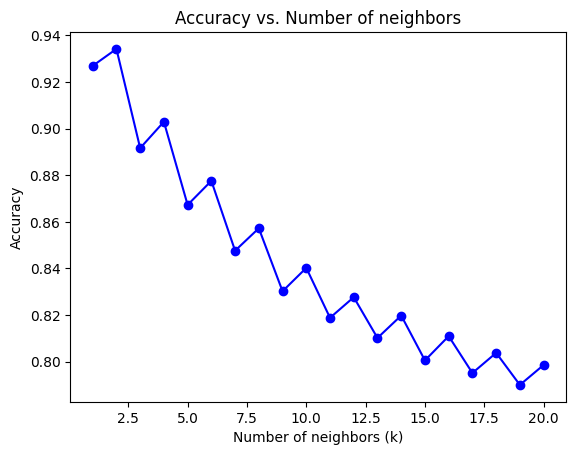

In [141]:

# Plot the accuracy scores for different values of k
plt.plot(k_values, accuracy_scores, 'bo-')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of neighbors')
plt.show()

In [142]:

# Find the value of k that gives the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best value of k is: {best_k}")

The best value of k is: 2


In [143]:


# Train a k-NN classifier with the best value of k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [144]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the classifier with a k of  {best_k} is: {accuracy:.2%}")

The accuracy of the classifier with a k of  2 is: 93.42%


In [145]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix and classification report for best k
knn = classification_report(y_test, y_pred)
print("Classification report for knn5:\n", knn)

Classification report for knn5:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      5144
           1       0.89      0.98      0.94      5029

    accuracy                           0.93     10173
   macro avg       0.94      0.93      0.93     10173
weighted avg       0.94      0.93      0.93     10173



In [146]:
knn_reg12 = KNeighborsRegressor(n_neighbors=2)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

MAE = mean_absolute_error(y_test,y_pred12)
MSE = mean_squared_error(y_test,y_pred12)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,y_pred12)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean absolute error of the model in the test set is: " , MAE)
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.09
The mean absolute error of the model in the test set is:  0.09466234149218519
The mean squared error of the model in the test set is:   0.08
The root mean squared error of the model in the test set is:   0.28
The R2 of the model in the test set is: 0.69


The KNN model appears to have performed reasonably well on the test set. The MAE and RMSE are relatively low, indicating that the model's predictions are fairly accurate. 

The R2 value of 0.69 suggests that the model explains about 69% of the variation in the dependent variable.

In [147]:
#model = LogisticRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("AUC-ROC score: {:.2f}".format(roc_auc))

Accuracy: 0.93
Precision: 0.89
Recall: 0.98
F1-score: 0.94
AUC-ROC score: 0.93


Based on the scores, the model appears to have good overall performance:


Accuracy: The accuracy score of 0.93 means that the model correctly classified 93% of the total instances, indicating that the model is performing well in terms of overall classification.


Precision: The precision score of 0.89 indicates that out of all the instances that the model predicted as positive, 89% of them were actually positive, suggesting that the model is doing a good job in predicting true positives.

Recall: The recall score of 0.98 indicates that out of all the actual positive instances, the model was able to correctly identify 98% of them, which indicates that the model is good at detecting actual positives.

F1-score: The F1-score of 0.94 indicates that the model is able to achieve a good balance between precision and recall, which means that the model is able to perform well in terms of both positive and negative classifications.

AUC-ROC score: The AUC-ROC score of 0.93 indicates that the model is able to distinguish between positive and negative classes with good accuracy, making it a reliable model.

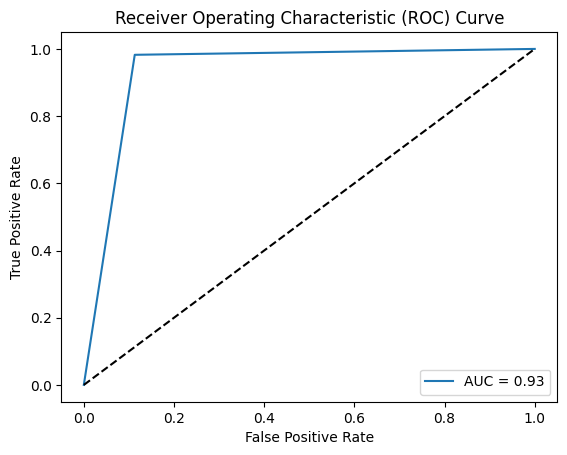

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [149]:

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is:\n{cm}")

The confusion matrix is:
[[4563  581]
 [  88 4941]]


The top-left quadrant represents the true negatives (TN): 4563. This means that the model correctly predicted 4563 times that the offer would be refused (actual value of 0) and it was indeed refused.

The top-right quadrant represents the false positives (FP): 581. This means that the model incorrectly predicted 581 times that the offer would be accepted (actual value of 1) when it was actually refused.

The bottom-left quadrant represents the false negatives (FN): 88. This means that the model incorrectly predicted 88 times that the offer would be refused (actual value of 0) when it was actually accepted.
    
The bottom-right quadrant represents the true positives (TP): 4941. This means that the model correctly predicted 4941 times that the offer would be accepted (actual value of 1) and it was indeed accepted.

Overall, the confusion matrix indicates that the model has a high accuracy since most of the values are in the true positives and true negatives quadrants. However, the model has a relatively high number of false positives, which could be an area of improvement.

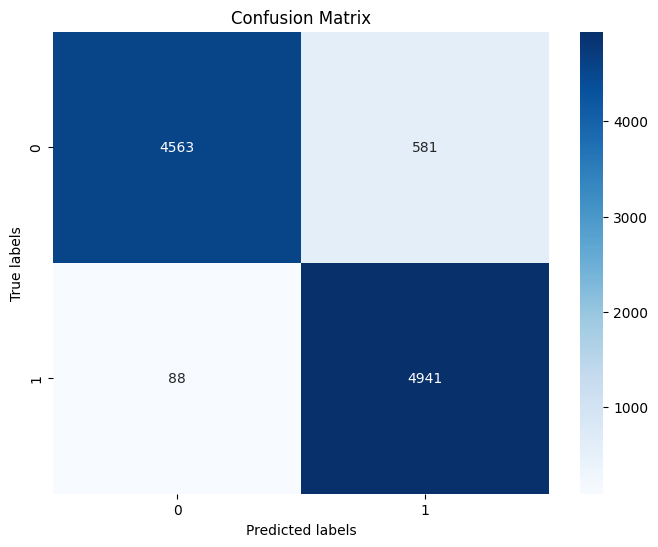

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

# Set axis labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()


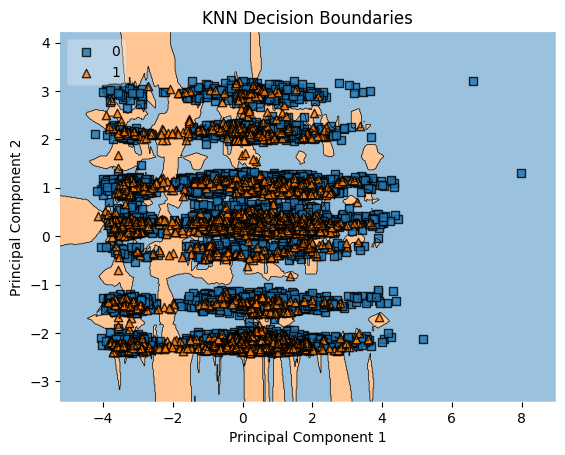

In [151]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Fit PCA to the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Fit KNN to the transformed data
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_pca, y_train)

# Predict on the test data and transform using PCA
X_test_pca = pca.transform(X_test)
y_pred = knn.predict(X_test_pca)

# Plot the decision boundaries
plot_decision_regions(X_test_pca, y_pred, clf=knn, legend=2)

# Add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries')
plt.show()


If the decision boundary is a straight line or hyperplane, the classifier is said to be a linear classifier. If the decision boundary is a curve or a more complex shape, the classifier is said to be a non-linear classifier.